# Get a dose plane 2D from 3D given a z coordinate

In [102]:
from Dosepy.bed import load_dose
import SimpleITK as sitk

In [ ]:
dose = load_dose(path_to_file = "/media/luis/TOMO/Dosepy/Hombro20en1/RD_3D_arc1y2.dcm")
print(dose.GetSize())
print(dose.GetOrigin())
print(dose.GetPixelIDValue())
print(dose.GetDirection())

(102, 90, 60)
(-92.9, -328.3, -59.0)
9
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


In [104]:
# A 3D Image with one slice
reference_img = sitk.Image(
    (dose.GetSize()[0], dose.GetSize()[1], 1),
    dose.GetPixelIDValue()
)

dose_origin = dose.GetOrigin()
print(dose_origin)

reference_img.SetOrigin((dose_origin[0], dose_origin[1], 0))
reference_img.SetDirection(dose.GetDirection())
reference_img.SetSpacing(dose.GetSpacing())

print(reference_img.GetOrigin())

(-92.9, -328.3, -59.0)
(-92.9, -328.3, 0.0)


In [105]:
interpolator = sitk.sitkLinear
identity = sitk.Transform(3, sitk.sitkIdentity)
#identity = identity.GetInverse()

interpolated_dose = sitk.Resample(
    dose,
    reference_img,
    identity,
    interpolator,
)

dose.GetSpacing()

(2.0, 2.0, 2.0)

In [106]:
dose.GetSize()

(102, 90, 60)

In [107]:
interpolated_dose.GetSize()

(102, 90, 1)

In [108]:
import matplotlib.pyplot as plt

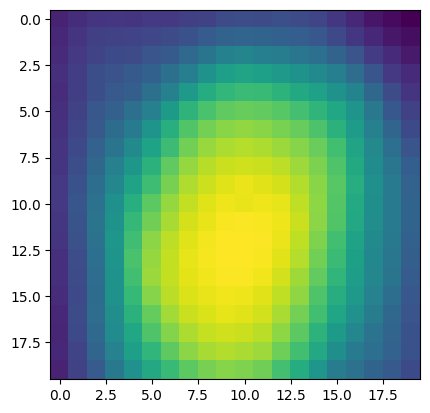

In [109]:
plt.imshow(sitk.GetArrayFromImage(dose[40:60,40:60,30]))

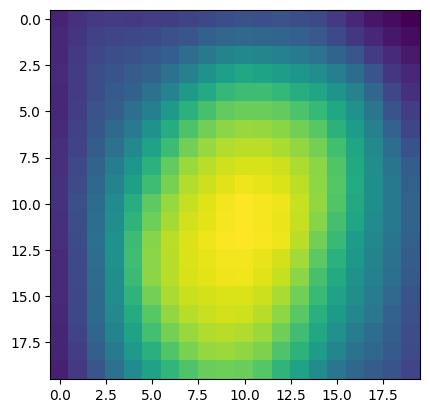

In [110]:
plt.imshow(sitk.GetArrayFromImage(interpolated_dose[40:60, 40:60, 0]))

In [113]:
sitk.GetArrayFromImage(dose[50:60, 50:60, 29])

array([[13.62561442, 13.30531094, 13.21116659, 12.63343493, 11.90616691,
        10.73696907,  9.56608521,  8.67929447,  7.76791388,  6.99358018],
       [13.34446534, 13.15535957, 13.01373452, 12.45890669, 11.53670968,
        10.37499514,  9.32324752,  8.45977563,  7.71210687,  6.94692951],
       [13.3265547 , 13.17617534, 13.0945464 , 12.30271707, 11.15391998,
        10.08759484,  8.93629466,  8.27816614,  7.53257247,  6.86487258],
       [12.99166072, 12.82754685, 12.56762856, 11.77662927, 10.65866027,
         9.59815836,  8.64221516,  7.99451397,  7.36596848,  6.7124311 ],
       [12.94416704, 12.68258868, 12.33187212, 11.4138253 , 10.1975488 ,
         9.31783931,  8.41687309,  7.92119837,  7.25308346,  6.57913235],
       [12.524311  , 12.30520718, 11.82327994, 10.92731989,  9.82767654,
         8.94836911,  8.22776733,  7.73126256,  7.00815771,  6.36836781],
       [12.38434602, 11.99697815, 11.33093833, 10.48038389,  9.39489008,
         8.70012321,  7.96285585,  7.47009922

In [111]:
sitk.GetArrayFromImage(dose[50:60, 50:60, 30])

array([[13.15784969, 13.24157966, 13.11036898, 12.57262175, 11.87659685,
        10.95980805,  9.82018027,  8.77634395,  7.94161209,  7.10605019],
       [13.39527916, 13.36070294, 13.23116529, 12.70341742, 11.8386875 ,
        10.92773491,  9.7476947 ,  8.69803515,  7.96618896,  7.12979703],
       [13.46275858, 13.40443551, 13.20159523, 12.58428117, 11.63959536,
        10.64449776,  9.50193891,  8.55766811,  7.86788146,  7.01274885],
       [13.44317489, 13.36987225, 13.04622268, 12.42142533, 11.46506712,
        10.46913948,  9.40530445,  8.4672719 ,  7.78666753,  6.92777381],
       [13.42027106, 13.25489916, 12.80796317, 12.11735944, 11.19765255,
        10.24253939,  9.30825498,  8.42687245,  7.69127813,  6.81155567],
       [13.20700344, 13.05121587, 12.58220608, 11.89409247, 10.87108488,
         9.9159847 ,  9.12331237,  8.23776668,  7.48426172,  6.62578302],
       [13.03372025, 12.81212632, 12.25563841, 11.5008884 , 10.61075157,
         9.62898645,  8.84465339,  8.06074833

In [112]:
sitk.GetArrayFromImage(interpolated_dose[50:60, 50:60])

array([[[13.39173205, 13.2734453 , 13.16076778, 12.60302834,
         11.89138188, 10.84838856,  9.69313274,  8.72781921,
          7.85476299,  7.04981519],
        [13.36987225, 13.25803126, 13.12244991, 12.58116205,
         11.68769859, 10.65136502,  9.53547111,  8.57890539,
          7.83914791,  7.03836327],
        [13.39465664, 13.29030543, 13.14807081, 12.44349912,
         11.39675767, 10.3660463 ,  9.21911679,  8.41791713,
          7.70022696,  6.93881071],
        [13.21741781, 13.09870955, 12.80692562, 12.0990273 ,
         11.06186369, 10.03364892,  9.02375981,  8.23089294,
          7.57631801,  6.82010246],
        [13.18221905, 12.96874392, 12.56991764, 11.76559237,
         10.69760067,  9.78018935,  8.86256404,  8.17403541,
          7.47218079,  6.69534401],
        [12.86565722, 12.67821153, 12.20274301, 11.41070618,
         10.34938071,  9.4321769 ,  8.67553985,  7.98451462,
          7.24620971,  6.49707542],
        [12.70903314, 12.40455223, 11.79328837, 10.9

# Check if a fiven z coordinate is between the coordinates of a dose distrubution

In [114]:
dose.GetOrigin()

(-92.9, -328.3, -59.0)

In [115]:
dose.GetDepth()

60

In [116]:
dose.GetSize()

(102, 90, 60)

In [117]:
dose.GetSpacing()

(2.0, 2.0, 2.0)

In [119]:
z_max = dose.GetOrigin()[2] + dose.GetDepth()*dose.GetSpacing()[2]
z_max

61.0

In [120]:
1 < 3 < 5

True

# Anonimizar RTDose

In [121]:
import pydicom

ds = pydicom.dcmread("/media/luis/TOMO/Dosepy/Hombro20en1/RD_3D_arc1y2.dcm")

In [122]:
ds

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 188
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: RT Dose Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.246.352.71.7.855512968882.125929.20250616082327
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.160.3
(0002,0013) Implementation Version Name         SH: 'DCIE 16.1'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 192'
(0008,0012) Instance Creation Date              DA: '20250616'
(0008,0013) Instance Creation Time              TM: '084226'
(0008,0016) SOP Class UID                       UI: RT Dose Storage
(0008,0018) SOP Instance UID                    UI: 1.2.246.352.71.7.855512968882.125929.20250616082327
(0008,0020) Study Date      

In [125]:


ds.InstitutionName = "Anonymous"
ds.PhysiciansOfRecord = "Anonymous"
ds.PatientName = "Anonymous"
ds.PatientBirthDate = "20000101"
ds.PatientID = "12345"

ds.save_as("RTDose_3D.dcm")

# Get dose using a mask

In [129]:
import numpy as np

dose = np.array([[1,2,3], [4,5,6],[7,8,9]])
mask = np.array([[1,1,1],[1,0,0],[0,0,0]])

data = dose[mask==1]
data

array([1, 2, 3, 4])